<a href="https://colab.research.google.com/github/luciabarg/mentoria_img/blob/master/PreAn%C3%A1lisis_y_visualizaci%C3%B3n_Notebook_0_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



**Imágenes: Conceptos Básicos**

*Basado en el Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python*

Github: https://github.com/vrulloni/MLIP


Podemos definir una imagen como una función o arreglo bidimensional f(x1,x2) donde x=(x1,x2) son las coordenadas espaciales, y el valor de f en cualquier x es la intensidad de la imagen en dicho punto, si es en grises o binaria.

Si es en color hay 3 valores de intensidad, uno por cada canal: R, G y B (red, green, blue).

Si es imagen satelital hay tantos valores como bandas o canales tenga la imagen (depende de la cantidad de sensores).

El tamaño de la imagen monocroma (en grises) es el número de filas por el número de columnas, M×N. Cada punto corresponde a un píxel. Si es a color: M×Nx3. Si es salelital: M×Nxk donde k es la cantidad de bandas (espectrales).


*Resolución de la imagen:* dada por la cantidad de píxeles

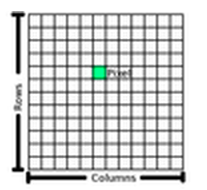

In [0]:
Imge('raster_dataset.png')

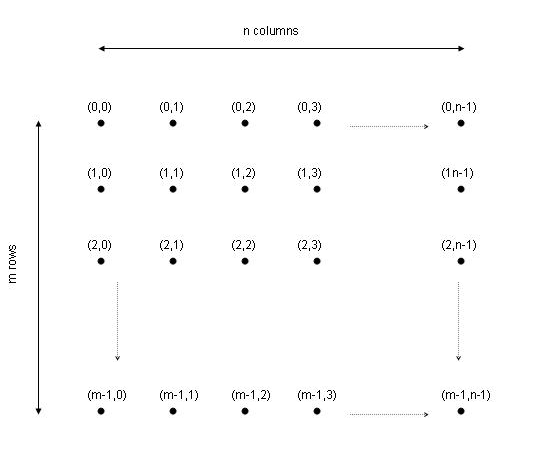

In [0]:
Imge('coordnadas.jpg')

La indexación de la imagen en Python sigue la convención habitual, comenzando en 0.

En el caso de imágenes en gris, al pixel le corresponde un número que es el valor de intensidad I(x,y).
En el caso de imágenes en color el tamaño del array será MxNx3. almacenando así en cada posición la intensidad de cada canal R, G y B. R será (x,y,1), G (x,y,2) y, por último, B (x,y,3). 

Si la intensidad se almacena como entero sin signo de 8 bits (uint8), su valor pertenece al intervalo [0 255].
        0 corresponde al negro                   255 corresponde al blanco.

Si la intensidad se almacena como entero de 16 bits (uint16) significa que pertenece al intervalo [0 65535], ya que corresponde a un entero sin signo de 16 bits.

Si la imagen es binaria, la intensidad toma solo los valores 0 o 1.

La coordenada (0,0) corresponde a la esquina superior izquierda de la imagen.
La coordenada (M-1, N-1) a la esquina inferior derecha.

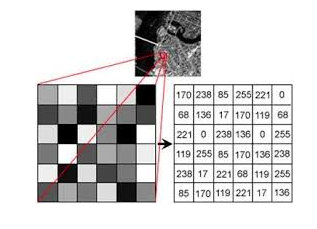

In [0]:
Imge('explicaimagen.jpg')

Hay dos formas de ejecutar lo siguiente, pueden hacerlo en su compu personal o en el Colab.

#### **Computadora personal**: 
Clonar el repositorio donde están las imágenes: https://github.com/diegobcuadro/dataset_ManosyGuantes y luego moverse entre las carpetas. 

Yo utilizo Ubuntu, voy a usar comandos de copiar y mover carpetas de ese sistema operativo, sinceramente no sé si funciona lo siguiente que les comento en Windows (quizás puedan usar Docker? -> Google nuestro bien amigo)



##### *Creación del entorno:*

Vamos a tener que instalar varias librerías. Para no comprometer los programas del sistema, sugiero que creen un entorno: 

In [0]:
#https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html

Desde la terminal: 

*$ conda create --name mentoria_img*

*$ conda activate mentoria_img*

pasará de *(base) -> (mentoria_img)*

Ahora si, podemos instalar las librerías necesarias, por única vez. 

Se puede hacerlo de consola con 

*$ pip install <paquete>*



o desde esta misma notebook como 

*! pip install <paquete>*

##### **Google Colab:** 

Antes de vincular su Drive con el Colab, tienen que tener el 'path' a la carpeta donde están los archivos. Acá está el link, es carpeta compartida: 

https://drive.google.com/drive/folders/1h1hHcEqzdruIsngERX8wdFjB2sM0S_aw?usp=sharing

Para conectar con el Drive, corran la siguiente celda y hagan click en el enlace azul. En la nueva ventana, seleccionan su cuenta de Gmail, van hasta el final de los permisos y pongan 'Permitir'.
Aparece un link negro y copien el enlace que les salta, vuelvan a la notebook y lo copian en el recuadro en blanco que aparece.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para chequear donde están los archivos que quieren, en las pestaña del costado, hay tres íconos. Uno que tiene 3 líneas, otro que tiene '< >' y otro que tiene una carpeta. Hagan click en la carpeta y esperen un ratito (rato, depende...) que se cargue todo.

Una vez que se carga, aparecen 2 carpetas: 'drive' y 'sample_data'. Hagan click en el triangulito de 'drive'. Va a aparece 'My Drive' y todas tus carpetas del Drive. Buscá tu carpeta (hasta donde esté el dataset que necesitás) y colocando arriba el cursor, hagan click derecho y seleccionen 'Copiar la ruta de acceso'. Y esa es la que copian en 'os.chdir'. 

In [0]:
# acá podemos indicar la capeta donde queremos estar. 
# Deberán cambiar la dirección, seguramente a uds se les agregará la carpeta en compartidas, por lo que deberán cambiar 
# el path de la siguiente línea:
import os
os.chdir('/content/drive/My Drive/Mentoria')

#### A partir de aquí, es independiente si están en su computadora o en el Colab. Lo que si... si están en su compu, tengan espacio disponible, porque vamos a cortar de las imágenes, las porciones de las manos y las guardaremos en archivos '.jpg'. Y son bastantes...
(yo lo corrí con este Colab)

In [0]:
# acá vamos importando las librerías necesarias 
# y a medida que van surgiendo por necesidad, las van sumando, para mantener un orden y poder ubicarlas rápido
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob

#seguimos agregando librerías necesarias:
#las que no tengan, vayan instalándolas
import cv2
import numpy as np

import matplotlib.pyplot as plt
import PIL
from PIL import Image
from os import path

from google.colab.patches import cv2_imshow #en Colab!

Tenemos 3 conjuntos de datos, Mañana, Tarde y Noche:

In [0]:
#para poder instalar paquetes por ej o listar las carpetas como en este ejemplo, hay que anteponer el símbolo de exclamación:
!ls

Dataset-M  Dataset-N  Dataset-T


Cada una de ellas, tiene otras carpetas 'G' y 'P':

In [0]:
! ls Dataset-M

G  P


y dentro de estas, dos carpetas, *'train'* y *'test'*, con su correspondiente archivo 'csv' de 'etiquetas'. 

In [0]:
! ls Dataset-M/G

M-G-Labels_test.csv  M-G-Labels_train.csv  test  train


A partir de dichos 'csv', extraemos algunas características de interés (recordar que son varias carpetas, 12 en total, por lo que serán 12 csv).
Podríamos analizar todas las carpetas, pero sugiero para esta primera aproximación y análisis de datos, utilizar sólo una de las carpetas principales (o sea, *'M'*,*'N'* o *'T'*), e incluso, tomar sólo una de las subcarpetas (*'G'* o *'P'*) y de éstas, solo *'test'* o *'train'*. 

Una vez que todo este proceso fue analizado y entendido, lo extenderemos a las demás carpetas para tener una mayor cantidad de datos. 


Entonces, para arrancar, utilizaremos la carpeta *'train'* del conjunto *'G'* del *'Dataset-M'*.



In [0]:
# acá podemos indicar la capeta donde queremos estar. 
# Deberán cambiar la dirección, seguramente a uds se les agregará la carpeta en compartidas, por lo que deberán cambiar 
# el path de la siguiente línea:
os.chdir('/content/drive/My Drive/Mentoria/Dataset-M/G/train')
#! ls #son muchas!

*Visualización con OpenCv*

In [0]:
#son muchas! elegimos cuaquiera para visualizar:
picture =  'M_G_Trabajando_Amarillos_16.jpg'
img=cv2.imread(picture)

In [0]:
print("El tipo de la primer imagen es ",type(img))
print("El tipo de cada píxel es ",type(img[0,0,0]))
print("La dimensión de la imagen es ",img.shape)

##A partir de shape podemos tomar variables con nombres más significativos
altura=img.shape[0]
ancho=img.shape[1]
canales=img.shape[2]
print("La altura es",altura,".El ancho es ",ancho,".Los canales de color son ",canales)

El tipo de la primer imagen es  <class 'numpy.ndarray'>
El tipo de cada píxel es  <class 'numpy.uint8'>
La dimensión de la imagen es  (1080, 1920, 3)
La altura es 1080 .El ancho es  1920 .Los canales de color son  3


**OJO!!!! En Jupiter Notebook:**
Para visualizar la imagen, se correr la siguiente celda, hacer click en la ventana emergente para visualizar la imagen. **Para cerrar la imágen, NO HAGAN CLICK EN LA CRUZ!!**, utilizen cualquier tecla del teclado (por ej. 'Esc').
Si lo cierran con la cruz, no dejan que OpenCV cierre la imagen por uds
y Jupyter se queda colgado, por lo que hay que resetear el kernel.

In [0]:
# Descomentar si lo corren en su computadora:

#imagen = cv2.resize(img, (int(altura/2), int(ancho/6))) #se hizo resize para mejor visualización! 
#cv2.imshow('imagen', imagen); cv2.waitKey(0); cv2.destroyAllWindows()

En **Colab** no sucede eso, solo se abre a continuación.

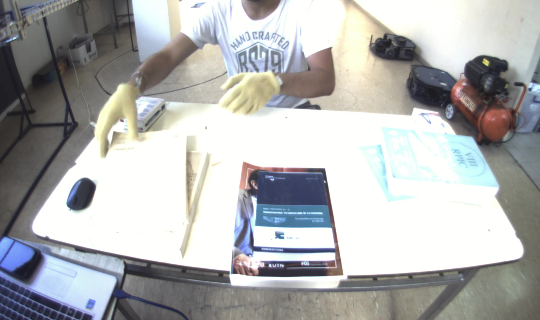

In [0]:
imagen = cv2.resize(img, (int(altura/2), int(ancho/6))) #se hizo resize para mejor visualización! 
cv2_imshow(imagen) #en Colab

### Generación de la tabla de Features:

In [0]:
# acá podemos indicar la capeta donde queremos estar. 
# Deberán cambiar la dirección, seguramente a uds se les agregará la carpeta en compartidas, por lo que deberán cambiar 
# el path de la siguiente línea:
os.chdir('/content/drive/My Drive/Mentoria/Dataset-M/G')
# leemos el archivo 'csv' de train: 
M_G_Labels_train=pd.read_csv('M-G-Labels_train.csv').sort_values(by=['filename'])
# visualizamos un par de datos:
M_G_Labels_train.head(2)

,filename,width,height,class,xmin,ymin,xmax,ymax
1875,M_G_Mostrando_Amarillos_0.jpg,1920,1080,hand,218,464,461,715
1876,M_G_Mostrando_Amarillos_0.jpg,1920,1080,hand,617,432,865,598


In [0]:
#generamos nuevas columnas, que utilizaremos mas adelante para identificar los distintos archivos:
M_G_Labels_train['day_time'] = 'M'
M_G_Labels_train['size'] = 'G'
#y descartamos las columnas de mas:
M_G_Labels_train = M_G_Labels_train.drop(['width', 'height','class'], axis=1)
#visualizamos como quedó:
M_G_Labels_train.head(2)

,filename,xmin,ymin,xmax,ymax,day_time,size
1875,M_G_Mostrando_Amarillos_0.jpg,218,464,461,715,M,G
1876,M_G_Mostrando_Amarillos_0.jpg,617,432,865,598,M,G


In [0]:
# con el siguiente comando, obtenemos un pantallazo rápido de los datos. 
# Para que incluya los valores de 'day_time' y 'size' agregar 'describe(include='all')':
# M_G_Labels_train.describe(include='all')
M_G_Labels_train.describe()

,xmin,ymin,xmax,ymax
count,1998.000000,1998.000000,1998.000000,1998.000000
mean,771.759760,258.468969,974.369369,433.731231
std,322.615291,115.444259,317.052207,143.799913
min,0.000000,0.000000,307.000000,128.000000
25%,553.250000,176.250000,748.000000,323.000000
50%,774.000000,252.000000,979.500000,404.000000
75%,984.000000,321.000000,1174.000000,509.000000
max,1641.000000,843.000000,1822.000000,944.000000


¿Qué son esos valores? son los valores límites del rectángulo que contiene las manos en las diferentes fotos. Luego visualizaremos algunas de las mismas para que se entienda mas.

De un pre-análisis, podemos notar que hay distintas clases de fotos, principalmente se separa en 3 grupos: 
* guantes ('Amarillos' y 'Verdes')
* manos   ('Manos')
* mano con guante ('Mano-Verde' y 'Mano-Amarillo')

Para qué? Para armar ya directamente la tabla con sus correspondientes etiquetas.

In [0]:
# Si se les ocurre como implementar que distinga esto  en Python, genial!!!
# (por lo general tenemos 2 filas con el mismo nombre ya que son 2 manos, a veces están juntas y salta solo un rectángulo)
# intenté con lo siguiente:
#    M_G_Labels_train.drop_duplicates(subset = ["filename"])
#    M_G_Labels_train['filename'].unique()
# pero solo tira los duplicados o los únicos, pero quisiera que indique las distintas clases de fotos,
# o sea: 'Amarillos', 'Verdes', 'Manos', 'Mano-Amarillo', 'Mano-Verde', para hacer lo que sigue 
# y saber que no estoy dejando algo de lado. De todas formas, lo corroboramos.


Vamos seleccionando por clases:

In [0]:
# identificamos de la columna 'filename' aquellas que contienen solo 'Manos'
manos = M_G_Labels_train[M_G_Labels_train['filename'].astype(str).str.contains("Manos")].copy()
# creamos una nueva columna para identificar si tienen guantes o no:
manos['guantes'] = 'no'
# al ser manos, no tienen color:
manos['color'] = 'mano'
manos_train_MG = manos.copy() #esto solo si leemos varios arhivos, para que queden identificados. Ahora, ahora, está de mas
manos_train_MG.shape[0]
# como ya lo generé y está en la carpeta de Drive, no es necesario hacerlo de nuevo. Si cambiaron algo, si, reemplazen el archivo.
# manos_train_MG.to_csv("manos_train_MG.csv")

539

In [0]:
#aquí hacemos la lista de filas únicas para saber cuántas fotos son:
manos_file = manos_train_MG #esto lo van cambiando si tienen otros csvs.
manos_list_ = pd.DataFrame(manos_file.groupby('filename').nunique()).copy()
manos_list_MG = manos_list_.index.values
len(manos_list_MG)

293

Para separar los guantes amarillos:

In [0]:
guantes_amarillos = M_G_Labels_train[M_G_Labels_train['filename'].astype(str).str.contains("Amarillos")].copy() #503
guantes_amarillos['guantes'] = 'si'
guantes_amarillos['color'] = 'amarillo'
guantes_amarillos_train_MG = guantes_amarillos.copy()
guantes_amarillos_train_MG.shape[0]
#guantes_amarillos_train_MG.to_csv("guantes_amarillos_train_MG.csv")

503

In [0]:
#aquí hacemos la lista de filas únicas para saber cuántas fotos son:
file_amarillos = guantes_amarillos_train_MG
guantes_amarillos_list_ = pd.DataFrame(file_amarillos.groupby('filename').nunique()).copy()
guantes_amarillos_list_MG = guantes_amarillos_list_.index.values
len(guantes_amarillos_list_MG)

257

Para separar los guantes verdes:

In [0]:
guantes_verdes = M_G_Labels_train[M_G_Labels_train['filename'].astype(str).str.contains("Verdes")].copy()
guantes_verdes['guantes'] = 'si'
guantes_verdes['color'] = 'verde'
guantes_verdes_train_MG = guantes_verdes.copy()
guantes_verdes.shape[0]
#guantes_verdes_train_MG.to_csv("guantes_verdes_train_MG.csv")

592

In [0]:
#aquí hacemos la lista de filas únicas para saber cuántas son:
file_verdes = guantes_verdes_train_MG
guantes_verdes_list_ = pd.DataFrame(file_verdes.groupby('filename').nunique()).copy()
guantes_verdes_list_MG = guantes_verdes_list_.index.values
len(guantes_verdes_list_MG)

325

Para separar mano con guante amarillo o verde. Luego para clasificación, habrá que definir en los archivos 'mano-verde' y 'mano-amarillo' cuál es la mano con guante de la que está sin guante para etiquetarlas correctamente. Por ahora, indicamos que en la foto, no hay guantes.

Mano-Verde:

In [0]:
mano_verde = M_G_Labels_train[M_G_Labels_train['filename'].astype(str).str.contains("Mano-Verde")].copy()
mano_verde['guantes'] = 'no'
mano_verde['color'] = 'verde'
mano_verde_train_MG = mano_verde.copy()
mano_verde.shape[0]
#mano_verde_MG.to_csv("mano_verde_train_MG.csv")

194

In [0]:
#aquí hacemos la lista de los archivos, para luego utilizarlos para sacar las características
file_verdes = mano_verde_train_MG
mano_verde_list_ = pd.DataFrame(file_verdes.groupby('filename').nunique()).copy()
mano_verde_list_MG = mano_verde_list_.index.values
len(mano_verde_list_MG)

99

Mano-Amarillo:

In [0]:
mano_amarillo = M_G_Labels_train[M_G_Labels_train['filename'].astype(str).str.contains("Mano-Amarillo")].copy()
mano_amarillo['guantes'] = 'no'
mano_amarillo['color'] = 'amarillo'
mano_amarillo_train_MG = mano_amarillo.copy()
mano_amarillo.shape[0]
#mano_amarillo_train_MG.to_csv("mano_amarillo_train_MG.csv")

170

In [0]:
#aquí hacemos la lista de los archivos, para luego utilizarlos para sacar las características
file_amarillos = mano_amarillo_train_MG
mano_amarillo_list_ = pd.DataFrame(mano_amarillo.groupby('filename').nunique()).copy()
mano_amarillo_list_MG = mano_amarillo_list_.index.values
len(mano_amarillo_list_MG)

85

Acá juntamos todos los archivos generados y los juntamos en un solo csv, donde ya tienen sus etiquetas correspondientes para un posterior análisis:

In [0]:
#lista de listas
with_labels=[manos, guantes_amarillos, guantes_verdes,mano_amarillo, mano_verde]
print(len(manos) + len(guantes_amarillos)+len(guantes_verdes) + len(mano_amarillo)+ len(mano_verde))
#sea la cantidad de datos del archivo original:
M_G_Labels_train.count().unique()

1998


array([1998])

In [0]:
#lista de listas
with_labels=[manos, guantes_amarillos, guantes_verdes,mano_amarillo, mano_verde]
print(len(manos) + len(guantes_amarillos)+len(guantes_verdes) + len(mano_amarillo)+ len(mano_verde))
#sea la cantidad de datos del archivo original:
M_G_Labels_train.count().unique()
#concatenamos los archivos:
file_wlabels_ = pd.concat(f for f in with_labels)
#los ordenamos y reseteamos índice
file_wlabels__ = file_wlabels_.sort_values(by=['filename']).reset_index()
#descartamos la columna de índices viejos:
file_wlabels = file_wlabels__.drop(['index'], axis=1)
#visualizamos la tabla:
file_wlabels.head()
# file_wlabels_MG = file_wlabels.copy()
# file_wlabels_MG.to_csv("file_wlabels_train_MG.csv")

,filename,xmin,ymin,xmax,ymax,day_time,size,guantes,color
0,M_G_Mostrando_Amarillos_0.jpg,218,464,461,715,M,G,si,amarillo
1,M_G_Mostrando_Amarillos_0.jpg,617,432,865,598,M,G,si,amarillo
2,M_G_Mostrando_Amarillos_1.jpg,617,431,865,598,M,G,si,amarillo
3,M_G_Mostrando_Amarillos_1.jpg,218,463,462,715,M,G,si,amarillo
4,M_G_Mostrando_Amarillos_10.jpg,447,436,759,683,M,G,si,amarillo


In [0]:
# vemos donde estamos, y los archivos csv presentes en dicha carpeta:
# 
! pwd
! ls *.csv
# si generaron los archivos, descomenten lo siguiente:
#! copy *_MG.csv /

/content/drive/My Drive/Mentoria/Dataset-M/G
M-G-Labels_test.csv  M-G-Labels_train.csv


Recuerden que para clasificación, habrá que definir en 'mano-verde' y 'mano-amarillo' cuál es la mano con guante de la que está sin guante para etiquetarlas correctamente.


### Cortar las imágenes y guardarlas en carpetas:

Vamos a seleccionar de las imágenes, la región de las manos, las cuales van a tener o no guantes. Las mismas, las vamos guardando en carpetas, solo esa partecita. Posiblemente, al final, tengamos solo dos conjuntos de datos: manos y guantes. Y a su vez, dentro de la clasificación de guantes, si son amarillos o verdes.

In [0]:
#En esta carpeta, están los '.csv' generados en la primera parte de la notebook
os.chdir("/content/drive/My Drive/Mentoria/Dataset-M/G/train")
!ls *.csv

file_wlabels_train_MG.csv	mano_amarillo_train_MG.csv
guantes_amarillos_train_MG.csv	manos_train_MG.csv
guantes_verdes_train_MG.csv	mano_verde_train_MG.csv


Creación del array de características:

In [0]:
# A filename_chosen lo vamos cammbiando, dependiendo del csv. 
# Quizás se podría usar un loop.. pero para no perdernos en el camino, vamos paso a paso
filename_chosen = 'guantes_verdes_train_MG.csv' 
filename_train_MG_=pd.read_csv(filename_chosen).sort_values(by=['filename'])
filename_train_MG = filename_train_MG_.drop(['Unnamed: 0'], axis=1)
filename_train_MG.shape[0]

592

In [0]:
# Acá creamos la carpeta para guardar las imágenes cortadas, se las crea una sola vez
#! mkdir 'crop/guantes_verdes_train_MG/'

In [0]:
!ls crop

features.py
guantes_amarillos_train_MG
guantes_amarillos_train_MG_cropped_df.csv
guantes_verdes_train_MG
guantes_verdes_train_MG_cropped_df.csv
mano_amarillo_train_MG
mano_amarillo_train_MG_cropped_df.csv
manos_train_MG
manos_train_MG_cropped_df.csv
mano_verde_train_MG
mano_verde_train_MG_cropped_df.csv


In [0]:
path_chosen = 'crop/'+str(filename_chosen[:-4]) +'/'
path_chosen

'crop/guantes_verdes_train_MG/'

In [0]:
# acá va leyendo por filas y por cada fila, genera una imagen. 
# Algunas fotos, van a tener dos regiones, por dos manos. 
# Pero a veces, están juntas las manos, por lo que hay un solo cuadradito
data_img_df = []
list_cropped = []
for frame, data in filename_train_MG.groupby('filename'):
  num_mano = 1
  if (data.shape[0] == num_mano):
      picture = data.filename.item()
      #print(picture)
      img=cv2.imread(picture)
      xmin = data.xmin.item()
      xmax = data.xmax.item()
      ymin = data.ymin.item()
      ymax = data.ymax.item()
      img_crop_name = picture[:-4]+'_single_box.jpg'
      path = path_chosen +'/'+img_crop_name
      #print(path)
      #print(img_crop_name)
      data_img = [img_crop_name, xmin, xmax, ymin,ymax]
      #print(data_img)
      data_img_df.append(data_img)
      list_cropped.append(picture)
      img_crop = img[ymin:ymax, xmin:xmax] 
      #cv2_imshow(img_crop)
      #cv2.imwrite(path,img_crop)
  else:
      row1 = data.iloc[0]
      img_row1_file = row1.filename
      img_row1=cv2.imread(img_row1_file)
      #cv2_imshow(img_row1)
      xmin_r1 = row1.xmin.item()
      xmax_r1 = row1.xmax.item()
      ymin_r1 = row1.ymin.item()
      ymax_r1 = row1.ymax.item()
      img_crop_name_row1 = img_row1_file[:-4]+'_double_box1.jpg'
      img_crop_row1 = img_row1[ymin_r1:ymax_r1, xmin_r1:xmax_r1] 
      path1 = path_chosen +'/'+img_crop_name_row1
      data_img1 = [img_crop_name_row1, xmin_r1, xmax_r1, ymin_r1,ymax_r1]
      #print(data_img1)
      data_img_df.append(data_img1)
      list_cropped.append(img_row1_file)
      #cv2.imwrite(path1, img_crop_row1)

      row2 = data.iloc[1]
      img_row2_file = row2.filename
      img_row2=cv2.imread(img_row2_file)
      xmin_r2 = row2.xmin.item()
      xmax_r2 = row2.xmax.item()
      ymin_r2 = row2.ymin.item()
      ymax_r2 = row2.ymax.item()
      img_crop_name_row2 = img_row2_file[:-4]+'_double_box2.jpg'
      data_img2 = [img_crop_name_row2, xmin_r2, xmax_r2, ymin_r2,ymax_r2]
      data_img_df.append(data_img2)
      list_cropped.append(img_row2_file)
      img_crop_row2 = img_row2[ymin_r2:ymax_r2, xmin_r2:xmax_r2] 
      path2 = path_chosen +'/'+img_crop_name_row2
      #cv2_imshow(img_crop)
      #cv2.imwrite(path2, img_crop_row2)

Guardamos el csv con el nombre de las imágenes y sus correspondientes coordenadas de su box. Esto lo usaremos luego para armar la tabla que finalmente, van a usar: 

In [0]:
#'classes/'+str(filename_chosen[:-4])+'_cropped_df.csv' # ya hice las clases. Ahora solo para guardar en su carpeta, los valores
#cropped_df = pd.DataFrame(data_img_df,
#                     columns = ['filename','xmin', 'xmax','ymin','ymax'])  
#cropped_df.head()
#cropped_df.to_csv('classes/'+str(filename_chosen[:-4])+'_cropped_df.csv') 

In [0]:
cropped_name_df = 'crop/'+ str(filename_chosen[:-4])+'_cropped_df.csv'
cropped_name_df

'crop/guantes_verdes_train_MG_cropped_df.csv'

In [0]:
cropped_df = pd.DataFrame(data_img_df,
                     columns = ['filename','xmin', 'xmax','ymin','ymax'])  
cropped_df.shape[0]

591

In [0]:
#cropped_df.to_csv(cropped_name_df) 

In [0]:
# para copiar toda una carpeta
#! rsync -r crop/manos_train_MG classes/

In [0]:
# para copiar un archivo
#! cp crop/manos_train_MG/manos_train_MG_cropped_df.csv classes/manos_train_MG_cropped_df.csv

### Finalmente.... tabla :) bueno... casi

De las figuras que tenían mano y guante, las miré en la carpeta del Drive y seleccioné las que tenían mano y guante amarillo o verde y armé las siguientes carpetas. Luego sumé las de solo guantes amarillos, que ahora también son fotos indivivuales, lo mismo para guantes verdes y las manos. 

Finalmente, tenemos 3 clases, mano, guantes amarillos y guantes verdes.

In [0]:
os.chdir("/content/drive/My Drive/Mentoria/Dataset-M/G/train/classes")
!ls

features_guante_amarillo_train_MG.json
features_guantes_amarillos_train_MG_cropped.json
features_guantes_verdes_train_MG_cropped.json
features_guante_verde_train_MG_cropped.json
features.json
features_mano_amarillo_train_MG_cropped.json
features_manos_train_MG_cropped.json
features_mano_verde_train_MG_cropped.json
features.py
guante_amarillo_train_MG
guante_amarillo_train_MG_cropped_df.csv
guante_amarillo_train_MG_cropped_features_labels_df.csv
guantes_amarillos_train_MG
guantes_amarillos_train_MG_cropped_df.csv
guantes_amarillos_train_MG_cropped_features_labels_df.csv
guantes_verdes_train_MG
guantes_verdes_train_MG_cropped_df.csv
guantes_verdes_train_MG_cropped_features_labels_df.csv
guante_verde_train_MG
guante_verde_train_MG_cropped_df.csv
guante_verde_train_MG_cropped_features_labels_df.csv
mano_amarillo_train_MG
mano_amarillo_train_MG_cropped_df.csv
mano_amarillo_train_MG_cropped_features_labels_df.csv
manos_train_MG
manos_train_MG_cropped_df.csv
manos_train_MG_cropped_features_la

El asunto es que.. quedaron mezclados los nombres de los archivos para guante en los archivos csv. Veremos si lo podemos separar automáticamente.

In [0]:
#os.chdir("/content/drive/My Drive/Mentoria/Dataset-M/G/train/classes/guante_verde_train_MG") #97 fotos
os.chdir("/content/drive/My Drive/Mentoria/Dataset-M/G/train/classes/guante_amarillo_train_MG") # 85 fotos ()
#Para agrupar los archivos de una carpeta según su nombre 
extension = 'jpg'
list_guantes_cropped_train_MG = [i for i in glob.glob('*.{}'.format(extension))]
list_guantes_cropped_train_MG.sort()
len(list_guantes_cropped_train_MG)

85

Ahora vemos si los podemos separar del archivo csv:

In [0]:
# archivos con mano y guantes: 
# mano_amarillo_train_MG_cropped_df.csv
# mano_verde_train_MG_cropped_df.csv

In [0]:
# A filename_chosen lo vamos cammbiando, dependiendo del csv. 
# Quizás se podría usar un loop.. pero para no perdernos en el camino, vamos paso a paso
#filename_crop_chosen = 'mano_verde_train_MG_cropped_df.csv' 
filename_crop_chosen = 'mano_amarillo_train_MG_cropped_df.csv' 
filename_crop_train_MG_=pd.read_csv(filename_crop_chosen).sort_values(by=['filename'])
filename_crop_train_MG = filename_crop_train_MG_.drop(['Unnamed: 0'], axis=1)
filename_crop_train_MG.head(6)

,filename,xmin,xmax,ymin,ymax,day_time,size,guantes,color
0,M_G_Mostrando_Mano-Amarillo_0_double_box1.jpg,934,1113,210,359,M,G,no,mano
1,M_G_Mostrando_Mano-Amarillo_10_double_box1.jpg,1074,1275,278,404,M,G,no,mano
2,M_G_Mostrando_Mano-Amarillo_11_double_box1.jpg,1063,1293,206,391,M,G,no,mano
3,M_G_Mostrando_Mano-Amarillo_12_double_box1.jpg,1060,1266,123,362,M,G,no,mano
4,M_G_Mostrando_Mano-Amarillo_13_double_box1.jpg,1064,1274,130,362,M,G,no,mano
5,M_G_Mostrando_Mano-Amarillo_14_double_box1.jpg,1078,1268,186,358,M,G,no,mano


In [0]:
list_guantes_cropped_train_MG[0:4]

['M_G_Mostrando_Mano-Amarillo_0_double_box2.jpg',
 'M_G_Mostrando_Mano-Amarillo_10_double_box2.jpg',
 'M_G_Mostrando_Mano-Amarillo_11_double_box2.jpg',
 'M_G_Mostrando_Mano-Amarillo_12_double_box2.jpg']

In [0]:
#color = 'verde'
color = 'amarillo'
#acá separamos las filas de los archivos con guantes verdes/amarillos
value_list = list_guantes_cropped_train_MG
guantes_si = filename_crop_train_MG.filename.isin(value_list)
guante_color_df = filename_crop_train_MG[guantes_si].copy()
#generamos nuevas columnas, que utilizaremos mas adelante para identificar los distintos archivos:
guante_color_df['day_time'] = 'M'
guante_color_df['size'] = 'G'
guante_color_df['guantes'] = 'si'
guante_color_df['color'] = color
guante_color_df.head(3)
#name_csv = 'guante_' + color + '_cropped_df.csv'
#guante_color_df.to_csv(name_csv) 

,filename,xmin,xmax,ymin,ymax,day_time,size,guantes,color
1,M_G_Mostrando_Mano-Amarillo_0_double_box2.jpg,436,662,273,474,M,G,si,amarillo
5,M_G_Mostrando_Mano-Amarillo_10_double_box2.jpg,307,503,227,357,M,G,si,amarillo
7,M_G_Mostrando_Mano-Amarillo_11_double_box2.jpg,304,503,162,351,M,G,si,amarillo


In [0]:
#acá separamos las filas de los archivos con manos verdes
value_list = list_guantes_cropped_train_MG
guantes_no = ~filename_crop_train_MG.filename.isin(value_list)
mano_color_df = filename_crop_train_MG[guantes_no].copy()

#generamos nuevas columnas, que utilizaremos mas adelante para identificar los distintos archivos:
mano_color_df['day_time'] = 'M'
mano_color_df['size'] = 'G'
mano_color_df['guantes'] = 'no'
mano_color_df['color'] = 'mano'
mano_color_df.head(3)
#name_csv = 'mano_' + color + '_cropped_df.csv'
#mano_color_df.to_csv(name_csv) 

,filename,xmin,xmax,ymin,ymax,day_time,size,guantes,color
0,M_G_Mostrando_Mano-Amarillo_0_double_box1.jpg,934,1113,210,359,M,G,no,mano
1,M_G_Mostrando_Mano-Amarillo_10_double_box1.jpg,1074,1275,278,404,M,G,no,mano
2,M_G_Mostrando_Mano-Amarillo_11_double_box1.jpg,1063,1293,206,391,M,G,no,mano


Nos faltan las etiquetas para guantes_amarillos, guantes_verdes y la manos solas_

In [11]:
os.chdir("/content/drive/My Drive/Mentoria/Dataset-M/G/train/classes") 
!ls *_cropped_df.csv

guante_amarillo_train_MG_cropped_df.csv
guantes_amarillos_train_MG_cropped_df.csv
guantes_verdes_train_MG_cropped_df.csv
guante_verde_train_MG_cropped_df.csv
mano_amarillo_train_MG_cropped_df.csv
manos_train_MG_cropped_df.csv
mano_verde_train_MG_cropped_df.csv


In [19]:
# A filename_chosen lo vamos cammbiando, dependiendo del csv. 
# Quizás se podría usar un loop.. pero para no perdernos en el camino, vamos paso a paso
#filename_crop_chosen = 'mano_verde_train_MG_cropped_df.csv' 
filename_crop_chosen = 'guantes_verdes_train_MG_cropped_df.csv' 
filename_crop_train_MG_=pd.read_csv(filename_crop_chosen).sort_values(by=['filename'])
filename_crop_train_MG = filename_crop_train_MG_.drop(['Unnamed: 0'], axis=1)
filename_crop_train_MG.head(6)

,filename,xmin,xmax,ymin,ymax
0,M_G_Mostrando_Verdes_0_double_box1.jpg,790,1031,291,433
1,M_G_Mostrando_Verdes_0_double_box2.jpg,212,462,464,708
5,M_G_Mostrando_Verdes_100_double_box1.jpg,398,563,150,312
6,M_G_Mostrando_Verdes_100_double_box2.jpg,855,1059,236,394
7,M_G_Mostrando_Verdes_101_double_box1.jpg,443,625,154,297
8,M_G_Mostrando_Verdes_101_double_box2.jpg,816,1054,225,365


In [20]:
color = 'verde'
#generamos nuevas columnas, que utilizaremos mas adelante para identificar los distintos archivos:
filename_crop_train_MG['day_time'] = 'M'
filename_crop_train_MG['size'] = 'G'
filename_crop_train_MG['guantes'] = 'si'
filename_crop_train_MG['color'] = color
filename_crop_train_MG.head(3)

,filename,xmin,xmax,ymin,ymax,day_time,size,guantes,color
0,M_G_Mostrando_Verdes_0_double_box1.jpg,790,1031,291,433,M,G,si,verde
1,M_G_Mostrando_Verdes_0_double_box2.jpg,212,462,464,708,M,G,si,verde
5,M_G_Mostrando_Verdes_100_double_box1.jpg,398,563,150,312,M,G,si,verde


In [0]:
#y reemplazamos el archivo:
#filename_crop_train_MG.to_csv('guantes_verdes_train_MG_cropped_df.csv') 

Finalmente, tenemos separadas las manos de los guantes, tenemos los siguientes archivos y carpetas:

In [0]:
os.chdir("/content/drive/My Drive/Mentoria/Dataset-M/G/train/classes")
!ls
#! mv mano_sola_train_MG/*Mano-Verde*.jpg   mano_verde_train_MG

csv_wlabels_train_MG_df.csv
features_guante_amarillo_train_MG.json
features_guantes_amarillos_train_MG_cropped.json
features_guantes_verdes_train_MG_cropped.json
features_guante_verde_train_MG_cropped.json
features.json
features_mano_amarillo_train_MG_cropped.json
features_manos_train_MG_cropped.json
features_mano_verde_train_MG_cropped.json
features.py
guante_amarillo_train_MG
guante_amarillo_train_MG_cropped_df.csv
guante_amarillo_train_MG_cropped_features_labels_df.csv
guantes_amarillos_train_MG
guantes_amarillos_train_MG_cropped_df.csv
guantes_amarillos_train_MG_cropped_features_labels_df.csv
guantes_verdes_train_MG
guantes_verdes_train_MG_cropped_df.csv
guantes_verdes_train_MG_cropped_features_labels_df.csv
guante_verde_train_MG
guante_verde_train_MG_cropped_df.csv
guante_verde_train_MG_cropped_features_labels_df.csv
mano_amarillo_train_MG
mano_amarillo_train_MG_cropped_df.csv
mano_amarillo_train_MG_cropped_features_labels_df.csv
manos_train_MG
manos_train_MG_cropped_df.csv
manos_

Verificamos que tengamos la misma cantidad de fotos como de filas en los csv:

In [0]:
extension = 'csv'
list_features_labels_df = [i for i in glob.glob('*MG_cropped_df.{}'.format(extension))]
list_features_labels_df

['guantes_amarillos_train_MG_cropped_df.csv',
 'guantes_verdes_train_MG_cropped_df.csv',
 'manos_train_MG_cropped_df.csv',
 'guante_verde_train_MG_cropped_df.csv',
 'guante_amarillo_train_MG_cropped_df.csv',
 'mano_amarillo_train_MG_cropped_df.csv',
 'mano_verde_train_MG_cropped_df.csv']

In [0]:
row_final = []
for name, file in zip(list_features_labels_df, files_csv_list):
  row_final.append(file.shape[0])
  print(name, 'filas:', file.shape[0])


print("\n Suma de todas las filas de los archivos:", sum(row_final))

guantes_amarillos_train_MG_cropped_df.csv filas: 503
guantes_verdes_train_MG_cropped_df.csv filas: 591
manos_train_MG_cropped_df.csv filas: 539
guante_verde_train_MG_cropped_df.csv filas: 97
guante_amarillo_train_MG_cropped_df.csv filas: 84
mano_amarillo_train_MG_cropped_df.csv filas: 86
mano_verde_train_MG_cropped_df.csv filas: 97

 Suma de todas las filas de los archivos: 1997


In [0]:
extension = ''
list_folders = [i for i in glob.glob('*_train_MG{}'.format(extension))]
list_folders

['guantes_amarillos_train_MG',
 'guantes_verdes_train_MG',
 'manos_train_MG',
 'guante_amarillo_train_MG',
 'guante_verde_train_MG',
 'mano_amarillo_train_MG',
 'mano_verde_train_MG']

In [0]:
#Para agrupar los archivos según su nombre:
sum_list=[]
extension = 'jpg'
for folder in list_folders:
  list_jpg = [i for i in glob.glob(str(folder)+'/*.{}'.format(extension))]
  sum_list.append(len(list_jpg))
  print(folder, 'imagenes', len(list_jpg))
print("\n Suma de todas las filas de los archivos:", sum(sum_list))

guantes_amarillos_train_MG imagenes 503
guantes_verdes_train_MG imagenes 591
manos_train_MG imagenes 539
guante_amarillo_train_MG imagenes 85
guante_verde_train_MG imagenes 97
mano_amarillo_train_MG imagenes 85
mano_verde_train_MG imagenes 97

 Suma de todas las filas de los archivos: 1997


Aparentemente, hay un error de un archivo cuando separamos los valores de los guantes amarillos, así como también perdimos una imagen de guantes verdes. Y cuando juntemos los dataframe, uno, va a estar mal.. pero bueno, no encuentro el error y no es lo importante en este momento... Si lo encuentran, genial!!!


In [0]:
# acá vamos cambiando los nombres de las carpetas. Nuevamente, se podría hacer un loop y todo lo que crean de modificar, genial!! :)
! python3 features.py mano_verde_train_MG

97 images
100% 97/97 [01:36<00:00,  1.01it/s]
features.json saved (97 features)


In [0]:
# copiamos el archivo json generado
#! cp features.json features_mano_verde_train_MG_cropped.json
#! pwd

/content/drive/My Drive/Mentoria/Dataset-M/G/train/classes


In [25]:
! ls *cropped_features_labels_df.csv

guante_amarillo_train_MG_cropped_features_labels_df.csv
guantes_amarillos_train_MG_cropped_features_labels_df.csv
guantes_verdes_train_MG_cropped_features_labels_df.csv
guante_verde_train_MG_cropped_features_labels_df.csv
mano_amarillo_train_MG_cropped_features_labels_df.csv
manos_train_MG_cropped_features_labels_df.csv
mano_verde_train_MG_cropped_features_labels_df.csv


In [47]:
# Acá van cambiando los distintos archivos:
filename_crop_chosen = 'manos_train_MG_cropped_df.csv' 
filename_crop_train_MG_ = pd.read_csv(filename_crop_chosen).sort_values(by=['filename'])
filename_crop_train_MG = filename_crop_train_MG_.drop(['Unnamed: 0'], axis=1)
filename_crop_train_MG.head()

,filename,xmin,xmax,ymin,ymax,day_time,size,guantes,color
0,M_G_Mostrando_Manos_0_single_box.jpg,759,942,95,230,M,G,no,mano
1,M_G_Mostrando_Manos_100_double_box1.jpg,470,694,239,426,M,G,no,mano
2,M_G_Mostrando_Manos_100_double_box2.jpg,773,1004,309,499,M,G,no,mano
3,M_G_Mostrando_Manos_101_double_box1.jpg,503,731,296,507,M,G,no,mano
4,M_G_Mostrando_Manos_101_double_box2.jpg,843,1074,347,568,M,G,no,mano


In [28]:
! ls *json

features_guante_amarillo_train_MG.json
features_guantes_amarillos_train_MG_cropped.json
features_guantes_verdes_train_MG_cropped.json
features_guante_verde_train_MG_cropped.json
features.json
features_mano_amarillo_train_MG_cropped.json
features_manos_train_MG_cropped.json
features_mano_verde_train_MG_cropped.json


In [0]:
path = '/content/drive/My Drive/Mentoria/Dataset-M/G/train/classes'
folder_chosen = 'manos_train_MG'
json_file = 'features_manos_train_MG_cropped.json'

In [49]:
string = path + folder_chosen 
len(string)

72

In [50]:
#bueno..... lo que sigue es una chanchada, como en varios dataframes de arriba, pero este.. jaja
# el objetivo lo cumple, generar un archivo como queremos y necesitamos. 
# Se aceptan sugerencias de optimizar el asunto, tanto acá como en toooda la notebook :) 
#features_file = 'features_guante_amarillo_train_MG.json'
df = pd.read_json(json_file)
features_train_MG_ = df.T.reset_index().copy()
features_train_MG_['filename'] = features_train_MG_['index'].str[len(string)+2:] #sorry, not sorry, esto lo voy cambiando para q den bien los nombres..
features_train_MG_ = features_train_MG_.drop(['index'], axis=1)
features_train_MG_ = features_train_MG_.set_index('filename')
features_train_MG = features_train_MG_.reset_index().sort_values(by=['filename']).copy()
features_train_MG.head()
#features_train_MG.to_csv('features_guantes_verdes_train_MG_cropped_df.csv') 


,filename,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Manos_0_single_box.jpg,0.148032,0.202859,0.152667,0.333371,0.304110,0.789049,0.849978,1.520906,0.996585,0.333489,0.343661,0.122352,0.036859,0.206710,0.334370,0.088455,0.204694,0.273235,0.764208,0.198692,0.373394,0.261008,0.391399,0.543989,0.330870,0.082233,0.799557,0.436306,0.134861,0.055692,0.065955,0.013590,0.671873,0.416527,0.185816,0.002233,0.003200,0.374027,0.328715,...,0.504167,0.157326,0.046484,1.145149,2.019938,2.602190,0.220175,0.438476,0.411886,0.294108,0.038748,0.297162,0.412343,0.132492,0.716982,0.396542,0.162441,0.033071,1.008023,0.850842,0.459573,0.224347,0.413740,0.879499,0.968432,0.025791,1.325223,0.760972,0.356393,0.196466,1.018900,0.042518,0.038755,0.262465,1.232228,0.083717,0.180834,0.740859,1.056098,0.033594
1,M_G_Mostrando_Manos_100_double_box1.jpg,0.343534,0.009023,0.635329,0.949532,0.068175,0.090632,0.608704,0.537554,0.635869,0.254287,0.319284,0.117081,0.517864,0.049902,0.387456,0.132686,0.251957,0.633036,0.258649,0.252744,0.272676,0.315224,1.381114,0.359096,0.278335,0.234556,0.199942,0.581222,0.551249,0.118609,0.278284,0.438832,0.043220,0.173585,0.288899,0.039888,0.644380,0.346842,0.295325,...,0.049915,0.202661,0.040381,0.082854,1.731295,0.322695,0.176672,0.198980,1.209673,0.863652,0.613450,0.104799,0.305576,0.012079,0.357851,0.248075,0.124494,0.061467,2.174509,0.480955,0.081565,0.372656,0.134700,0.109356,1.187987,0.657176,0.431530,0.031721,0.426898,0.157986,0.893774,0.061225,0.089679,0.041779,1.084665,0.359515,0.028138,0.111933,0.123340,0.410387
2,M_G_Mostrando_Manos_100_double_box2.jpg,0.531572,0.431893,0.521901,1.257921,0.042135,0.182759,0.222551,1.189165,0.751430,0.037262,0.084397,0.264393,0.599555,0.153669,0.170568,0.060490,0.513607,0.256934,0.070559,0.033447,0.202479,0.458518,0.519446,0.180882,0.384754,0.285809,0.011977,0.261081,0.131941,0.082824,0.040202,0.032012,0.444448,0.754151,0.054281,0.062454,0.409131,0.406333,0.461120,...,0.798202,0.117997,0.046934,0.419447,0.994292,1.623708,0.166261,0.670128,0.699846,0.431115,0.359271,0.042635,0.055434,0.041626,0.751712,0.209788,0.819446,0.049065,0.584292,0.311956,0.033402,0.019740,0.427619,0.707635,0.612555,0.048258,0.947732,0.253227,0.855666,0.301839,1.720054,0.217295,0.770540,0.270849,0.443432,0.099575,0.448039,0.483993,0.692017,0.282967
3,M_G_Mostrando_Manos_101_double_box1.jpg,0.349947,0.217046,0.160668,0.638095,0.380898,0.219144,0.085434,0.329285,0.426335,0.103135,0.270348,0.037630,0.424075,0.241169,0.452870,0.097827,0.031919,0.162239,0.081904,0.608616,0.294478,0.194415,0.926816,0.240110,0.225691,0.620841,0.103072,0.447347,0.570524,0.000602,0.054114,0.017094,0.057724,0.238942,0.681670,0.341636,0.542309,0.277001,0.394622,...,0.251723,0.156160,0.108316,0.327337,2.346769,0.759400,0.225729,0.365828,0.813192,0.642414,0.593659,0.401892,0.083375,0.092001,0.337370,0.222600,0.088120,0.172932,1.713275,0.304721,0.410472,0.261457,0.134005,0.331370,0.951689,0.046531,0.565791,0.315435,0.674783,0.339165,0.634136,0.148474,0.394317,0.147725,0.876086,0.120616,0.021636,0.114818,0.048138,0.602387
4,M_G_Mostrando_Manos_101_double_box2.jpg,0.085512,0.588284,0.018633,0.220581,0.003231,0.195832,0.068189,1.544126,0.056333,0.151346,0.294465,0.358451,0.223575,0.109842,0.081797,0.149526,0.504032,0.133806,0.237155,0.168526,0.365522,0.225449,0.621661,0.075695,0.000000,0.661165,0.006497,0.290713,0.464778,0.021619,0.070504,0.138569,0.124871,0.102753,0.406909,0.298920,0.437060,0.186878,0.359636,...,0.163949,0.196622,0.107532,0.615254,2.092985,1.149768,0.125873,0.148307,0.806788,0.718203,0.821488,0.197933,0.012959,0.057151,1.145342,0.484313,0.229976,0.036506,0.727868,0.507298,0.174215,0.054493,0.263653,0.394134,1.588969,0.166228,0.909226,0.088048,0.467

Ya tenemos todos los archivos con sus features correspondientes. Como separamos los rectángulos de cada mano, tenemos como:

In [51]:
result_name = filename_crop_chosen[:-7] + '_features_labels_df.csv'
result_name

'manos_train_MG_cropped_features_labels_df.csv'

In [52]:
filename_crop_train_MG.head()

,filename,xmin,xmax,ymin,ymax,day_time,size,guantes,color
0,M_G_Mostrando_Manos_0_single_box.jpg,759,942,95,230,M,G,no,mano
1,M_G_Mostrando_Manos_100_double_box1.jpg,470,694,239,426,M,G,no,mano
2,M_G_Mostrando_Manos_100_double_box2.jpg,773,1004,309,499,M,G,no,mano
3,M_G_Mostrando_Manos_101_double_box1.jpg,503,731,296,507,M,G,no,mano
4,M_G_Mostrando_Manos_101_double_box2.jpg,843,1074,347,568,M,G,no,mano


In [53]:
left  = filename_crop_train_MG
right = features_train_MG
result = pd.merge(left, right, on='filename')
result_name_df = result.copy()
#result_name_df.to_csv(result_name) 
result_name_df.describe()

,xmin,xmax,ymin,ymax,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,752.174397,945.977737,294.428571,464.256030,0.311054,0.296201,0.455416,0.361459,0.218977,0.251461,0.310837,0.825527,0.628450,0.212253,0.285891,0.154832,0.349282,0.423711,0.211451,0.112854,0.168352,0.369457,0.223554,0.249605,0.232085,0.385283,0.605560,0.212557,0.188282,0.306458,0.234256,0.502472,0.201315,0.116439,0.158665,0.189704,0.280318,0.283468,0.277471,0.130412,...,0.376807,0.143543,0.065440,0.539059,1.465404,1.518838,0.196836,0.229307,0.445138,0.555674,0.449715,0.174658,0.162357,0.151248,0.582663,0.345410,0.363086,0.194665,1.097428,0.474503,0.200936,0.202839,0.255863,0.454550,0.819672,0.176212,0.590283,0.282252,0.479433,0.103551,0.645109,0.423014,0.256425,0.218665,1.112375,0.212676,0.171708,0.207381,0.228683,0.307937
std,359.852514,348.105846,120.566491,145.494559,0.212413,0.227033,0.387510,0.279208,0.190979,0.206234,0.261305,0.396841,0.419674,0.188903,0.213026,0.145178,0.225369,0.318332,0.153677,0.109227,0.189981,0.274302,0.197198,0.299319,0.193383,0.256087,0.495821,0.182802,0.215792,0.208988,0.245781,0.321556,0.168218,0.119292,0.151563,0.207876,0.206933,0.197113,0.176028,0.128714,...,0.376761,0.113238,0.071129,0.332904,0.699363,0.640879,0.188611,0.230229,0.306740,0.334204,0.314959,0.189231,0.130472,0.107022,0.378286,0.261920,0.295263,0.186211,0.483092,0.281004,0.200211,0.173207,0.192397,0.298734,0.351084,0.187777,0.493337,0.301549,0.228082,0.105789,0.314226,0.406705,0.229331,0.182445,0.466941,0.178719,0.186368,0.160116,0.243299,0.204147
min,0.000000,307.000000,1.000000,128.000000,0.005471,0.000000,0.006163,0.009856,0.000000,0.000000,0.000000,0.076645,0.023048,0.003539,0.000000,0.000000,0.000000,0.002063,0.000000,0.000000,0.000000,0.002415,0.001510,0.000000,0.000000,0.020882,0.022410,0.000000,0.000000,0.000000,0.000000,0.010350,0.000000,0.000000,0.000000,0.000000,0.000000,0.003376,0.010412,0.000000,...,0.000000,0.002061,0.000000,0.003892,0.012937,0.098471,0.000000,0.000046,0.010037,0.000412,0.003051,0.000000,0.000000,0.000000,0.000076,0.000000,0.002775,0.000000,0.066240,0.025648,0.000000,0.000088,0.000000,0.018997,0.061089,0.000000,0.000000,0.000000,0.058246,0.000000,0.008418,0.000000,0.000000,0.000000,0.028360,0.000000,0.000000,0.001838,0.000000,0.002436
25%,486.500000,673.000000,219.500000,363.000000,0.146996,0.124264,0.172930,0.175971,0.079900,0.091151,0.111176,0.502615,0.303466,0.087243,0.116655,0.049907,0.185719,0.187340,0.088311,0.036980,0.034038,0.163936,0.088733,0.059495,0.086903,0.198664,0.242307,0.078070,0.039928,0.163820,0.072507,0.280757,0.076161,0.034494,0.054002,0.059989,0.114343,0.154079,0.155564,0.034162,...,0.125385,0.049978,0.014554,0.282358,0.873322,1.034581,0.076771,0.084205,0.225971,0.306987,0.213624,0.046814,0.067486,0.074121,0.293667,0.142675,0.140007,0.063886,0.723562,0.263125,0.057359,0.070483,0.117220

In [0]:
result_name_df.head()

,filename,xmin,xmax,ymin,ymax,day_time,size,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Mano-Verde_0_double_box2.jpg,1065,1216,127,269,M,G,no,mano,0.394562,0.051412,0.606716,0.559394,0.250087,0.192918,0.481933,0.988663,0.889406,0.455347,0.045039,0.150679,0.337128,0.083494,0.069895,0.180861,0.036885,0.649810,0.172528,0.098208,0.000000,1.017477,1.487267,0.309785,0.950181,0.450612,0.306047,0.563319,0.000000,0.283573,0.489678,...,0.895124,0.212783,0.092070,0.593923,1.247495,1.204558,0.045143,0.066199,0.452813,0.575817,0.621100,0.422301,0.024473,0.120940,0.803128,0.459520,0.263006,0.004530,0.545075,0.354610,0.033106,0.210992,0.190581,0.444981,0.783670,0.393779,0.387834,0.534387,0.476344,0.027595,0.398378,0.463712,0.078141,0.069605,0.438615,0.755381,0.052465,0.087881,0.172477,0.381967
1,M_G_Mostrando_Mano-Verde_10_double_box2.jpg,893,1125,334,531,M,G,no,mano,0.177398,0.119398,0.146152,0.339480,0.103909,0.493949,0.069922,0.374109,0.183683,0.038771,0.556205,0.095518,0.588376,0.051516,0.413058,0.069755,0.000492,0.363797,0.283108,0.151490,0.615272,0.749402,1.606826,0.064174,0.136578,0.508376,0.302786,0.613601,0.552033,0.069343,0.221348,...,0.091941,0.030911,0.070056,0.514848,2.881877,0.661493,0.053673,0.221106,1.049408,1.011474,0.829665,0.044072,0.033485,0.093096,0.593142,0.146060,0.173322,0.127705,0.969954,0.448644,0.138727,0.193269,0.263606,0.168484,1.108276,0.035950,0.641720,0.137501,0.884099,0.150897,0.484994,0.016651,0.331880,0.305692,1.553546,0.206083,0.011385,0.017328,0.666230,0.498980
2,M_G_Mostrando_Mano-Verde_11_double_box2.jpg,841,1097,390,627,M,G,no,mano,0.245393,0.112010,0.001286,0.334871,0.349437,0.261885,0.066054,0.124235,0.310102,0.173320,0.406209,0.103022,0.319889,0.085725,0.392808,0.163622,0.000000,0.577755,0.048576,0.280021,0.415372,0.849573,1.495139,0.097399,0.039189,0.420887,0.249145,0.699717,0.575266,0.042046,0.091912,...,0.080814,0.097637,0.086748,0.306800,3.271884,0.626073,0.048265,0.134591,1.060043,0.622189,1.312368,0.019744,0.008090,0.121558,0.435961,0.071854,0.234283,0.180198,0.616154,0.457151,0.131871,0.018355,0.175228,0.175823,0.928015,0.021257,0.644019,0.069578,0.821514,0.127890,0.336019,0.007985,0.322126,0.314646,1.231646,0.108399,0.003300,0.009745,0.777464,0.423591
3,M_G_Mostrando_Mano-Verde_13_double_box1.jpg,786,989,487,664,M,G,no,mano,0.325789,0.551434,0.058581,0.014298,0.009587,0.158838,0.058338,0.299443,0.215389,0.052208,0.300971,0.089273,0.279458,0.219147,0.074932,0.034909,0.006514,0.120454,0.163719,0.004485,0.062252,0.341321,0.397441,0.028825,0.007967,0.296563,0.036996,0.328557,0.078661,0.000000,0.028814,...,0.073493,0.010129,0.084852,0.598002,2.652465,1.188614,0.057606,0.013154,0.470722,0.450808,0.658031,0.077011,0.103973,0.276906,0.810280,0.029062,0.027044,0.040080,0.888680,0.732855,0.045907,0.001360,0.049327,0.268357,0.755537,0.024503,0.079962,0.017539,0.694743,0.022808,0.388973,0.016058,0.426414,0.139633,0.722198,0.279273,0.000000,0.245087,0.124715,0.154982
4,M_G_Mostrando_Mano-Verde_14_double_box1.jpg,776,969,492,673,M,G,no,mano,0.411123,0.333547,0.046362,0.018092,0.207644,0.486235,0.085692,0.448555,0.286947,0.062296,0.484385,0.040225,0.274087,0.361603,0.252514,0.012043,0.026870,0.139836,0.045496,0.043660,0.480502,0.630268,1.578171,0.095247,0.008666,0.327858,0.089545,0.772782,0.227644,0.011907,0.052876,...,0.032627,0.020295,0.191381,0.452343,2.854373,0.919329,0.059777,0.039417,0.603350,0.553040,0.947557,0.127820,0.080935,0.271429,0.592878,0.013889,0.131210,0.066962,1.396267,0.723109,0.016277,0.023391,0.057829,0.225402,0.903709,0.018976,0.044767,0.025960,0.556010,0.188796,0.435060,0.038387,0.469564,0.143388,0.869727,0.705895,0.009276,0.040322,0.129173,0.280189


Entonces, finalmente... podemos juntar entre las manos y guantes. Armaremos una nueva carpeta con etiquetas para que puedan reproducir todos los passos anteriores para los demás conjuntos de datos.

In [54]:
os.chdir("/content/drive/My Drive/Mentoria/Dataset-M/G/train/classes")
!ls 

csv_wlabels_train_MG_df.csv
features_guante_amarillo_train_MG.json
features_guantes_amarillos_train_MG_cropped_df.csv
features_guantes_amarillos_train_MG_cropped.json
features_guantes_verdes_train_MG_cropped_df.csv
features_guantes_verdes_train_MG_cropped.json
features_guante_verde_train_MG_cropped.json
features.json
features_mano_amarillo_train_MG_cropped.json
features_manos_train_MG_cropped.json
features_mano_verde_train_MG_cropped.json
features.py
guante_amarillo_train_MG
guante_amarillo_train_MG_cropped_df.csv
guante_amarillo_train_MG_cropped_features_labels_df.csv
guantes_amarillos_train_MG
guantes_amarillos_train_MG_cropped_df.csv
guantes_amarillos_train_MG_cropped_features_labels_df.csv
guantes_verdes_train_MG
guantes_verdes_train_MG_cropped_df.csv
guantes_verdes_train_MG_cropped_features_labels_df.csv
guante_verde_train_MG
guante_verde_train_MG_cropped_df.csv
guante_verde_train_MG_cropped_features_labels_df.csv
mano_amarillo_train_MG
mano_amarillo_train_MG_cropped_df.csv
mano_a

In [55]:
extension = 'csv'
list_features_labels_df = [i for i in glob.glob('*features_labels_df.{}'.format(extension))]
list_features_labels_df

['guante_amarillo_train_MG_cropped_features_labels_df.csv',
 'guantes_amarillos_train_MG_cropped_features_labels_df.csv',
 'guantes_verdes_train_MG_cropped_features_labels_df.csv',
 'guante_verde_train_MG_cropped_features_labels_df.csv',
 'mano_amarillo_train_MG_cropped_features_labels_df.csv',
 'manos_train_MG_cropped_features_labels_df.csv',
 'mano_verde_train_MG_cropped_features_labels_df.csv']

In [0]:
list_features_labels_df[0]

'guante_amarillo_train_MG_cropped_features_labels_df.csv'

In [0]:
#juntamos todos los arhivos en una hermosa y gigante tabla final!! De train... de MG.. ahhhh faltan solo 11 mas jajaja
csv_wlabels = (pd.read_csv(f).drop(['Unnamed: 0'], axis=1) for f in list_features_labels_df)
csv_wlabels_train_MG_df = pd.concat(csv_wlabels, ignore_index=True)
#csv_wlabels_train_MG_df.to_csv('csv_wlabels_train_MG_df.csv') 

In [57]:
csv_wlabels_train_MG_df.head(2)

,filename,xmin,xmax,ymin,ymax,day_time,size,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Mano-Amarillo_0_double_box2.jpg,436,662,273,474,M,G,si,amarillo,1.192934,0.132554,0.292861,0.704324,0.043486,0.561370,0.492875,0.415565,0.606461,0.405709,0.532783,0.382000,0.859358,0.157759,0.539070,0.180152,0.087641,0.451658,0.067623,0.188491,0.273504,0.352612,0.365537,0.085581,0.049281,0.534786,0.346597,0.729510,0.327267,0.175310,0.214354,...,0.109618,0.201162,0.053464,0.400421,1.828703,0.766772,0.345443,0.320869,0.876834,1.105888,0.36042,0.137844,0.201754,0.184912,1.058968,0.694844,0.348436,0.221967,1.842808,0.593052,0.208990,0.419584,0.467739,0.847367,0.767512,0.429070,0.462808,0.097680,0.373019,0.05548,0.850606,0.618605,0.579222,0.214956,1.543457,0.240321,0.015946,0.498210,0.105096,0.415124
1,M_G_Mostrando_Mano-Amarillo_10_double_box2.jpg,307,503,227,357,M,G,si,amarillo,0.473153,0.326438,0.872934,0.272843,0.581942,0.085599,0.116944,1.393549,0.868530,0.557496,0.077261,0.120294,0.248606,0.222858,0.037286,0.110815,0.024490,0.304910,0.080512,0.987467,0.256264,0.208748,0.706314,0.027361,0.048373,0.121103,0.151871,0.414459,0.020769,0.036364,0.139919,...,0.114571,0.486142,0.007770,0.081066,0.650191,1.732524,0.107846,0.190294,0.139264,0.262592,0.81804,0.411074,0.561725,0.178695,1.652464,0.323930,0.114231,0.034584,0.112140,0.549182,0.521623,0.479088,0.086294,0.663143,0.556707,0.101734,0.252282,0.200444,0.193105,0.22618,0.327536,0.041440,0.610802,0.714450,1.010661,0.164083,0.489083,0.401081,0.334849,0.009120


In [58]:
csv_wlabels_train_MG_df.describe()

,xmin,xmax,ymin,ymax,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
count,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,...,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000
mean,771.657816,974.319138,258.218938,433.529058,0.477770,0.331842,0.445396,0.373106,0.219712,0.266277,0.432418,0.929838,0.555243,0.265715,0.323893,0.245734,0.473116,0.351616,0.216477,0.141867,0.208300,0.391411,0.406250,0.228911,0.188195,0.379157,0.539597,0.322744,0.241840,0.317191,0.278264,0.620548,0.213563,0.159680,0.193713,0.304085,0.242244,0.308130,0.313400,0.150645,...,0.395579,0.200528,0.075142,0.475661,1.288574,1.274743,0.167222,0.303251,0.430871,0.618949,0.389508,0.247155,0.190523,0.157521,0.733245,0.405542,0.502956,0.183366,0.899037,0.519834,0.175979,0.347612,0.241890,0.495322,0.757072,0.200101,0.433913,0.271685,0.409189,0.134600,0.539357,0.418268,0.352605,0.269870,0.869333,0.272479,0.221077,0.261720,0.217420,0.253174
std,322.755374,317.190835,114.742089,143.397632,0.367963,0.261997,0.347320,0.286808,0.198534,0.226057,0.315389,0.418831,0.365728,0.195801,0.250399,0.290876,0.352024,0.251262,0.174546,0.128747,0.216942,0.269424,0.370876,0.252726,0.171419,0.250389,0.442542,0.327718,0.269646,0.208702,0.239106,0.412825,0.175200,0.150416,0.172410,0.304076,0.176697,0.233776,0.206846,0.144169,...,0.311965,0.150707,0.088064,0.330557,0.749176,0.610341,0.152124,0.277516,0.291269,0.351078,0.302060,0.209879,0.148432,0.113736,0.576239,0.273691,0.373283,0.167314,0.499653,0.284278,0.166945,0.261882,0.184747,0.312581,0.340874,0.204811,0.418447,0.260211,0.228247,0.141702,0.327215,0.420016,0.312070,0.233409,0.450767,0.212012,0.205468,0.188005,0.227270,0.183336
min,0.000000,307.000000,0.000000,128.000000,0.000390,0.000000,0.000000,0.000268,0.000000,0.000000,0.000000,0.065238,0.000000,0.000932,0.000000,0.000000,0.000000,0.001869,0.000000,0.000000,0.000000,0.002415,0.001510,0.000000,0.000000,0.001431,0.003762,0.000000,0.000000,0.000000,0.000000,0.000757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.012937,0.098471,0.000000,0.000000,0.003355,0.000412,0.000635,0.000000,0.000000,0.000000,0.000076,0.000000,0.000644,0.000000,0.030766,0.025648,0.000000,0.000088,0.000000,0.003396,0.042753,0.000000,0.000000,0.000000,0.008218,0.000000,0.003120,0.000000,0.000000,0.000000,0.028360,0.000000,0.000000,0.000000,0.000000,0.000000
25%,553.000000,747.750000,176.750000,322.750000,0.205745,0.136916,0.195043,0.165223,0.073274,0.099189,0.195196,0.601902,0.283189,0.121615,0.142872,0.069243,0.221102,0.171811,0.083302,0.046032,0.055697,0.187238,0.132023,0.063270,0.060963,0.197824,0.206759,0.094862,0.052130,0.163287,0.109996,0.322128,0.082701,0.051307,0.067601,0.097395,0.108273,0.145583,0.161522,0.048113,...,0.170465,0.088007,0.014220,0.236299,0.675619,0.805388,0.061588,0.110731,0.219984,0.356615,0.162219,0.093307,0.080304,0.069624,

In [59]:
csv_wlabels_train_MG_df[50:100]

,filename,xmin,xmax,ymin,ymax,day_time,size,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
50,M_G_Trabajando_Mano-Amarillo_29_double_box2.jpg,792,1001,165,355,M,G,si,amarillo,0.124820,0.529893,0.000000,0.652832,0.031838,0.361343,0.865000,1.671852,0.401791,0.277903,0.525542,0.054187,0.120880,0.253960,0.168601,0.058381,0.022497,0.535922,0.191300,0.188938,0.057208,0.533398,0.203044,0.339988,0.087975,0.010556,0.206732,0.469182,0.183302,0.091289,0.238412,...,0.568261,0.059336,0.071083,0.728007,2.087496,1.157397,0.163176,0.365400,0.279348,0.091387,0.005376,0.222818,0.160420,0.047382,1.117592,0.887821,0.303386,0.151303,1.056848,0.203283,0.169167,0.701920,0.141923,0.500343,0.844070,0.153782,0.367205,0.173932,0.330241,0.085916,1.206947,0.108076,0.000525,0.348339,1.058518,0.165652,0.228887,0.349107,0.193542,0.389014
51,M_G_Trabajando_Mano-Amarillo_2_double_box1.jpg,1196,1316,117,235,M,G,si,amarillo,0.407055,0.544537,0.096994,0.276672,0.035233,0.038362,0.378781,0.682350,0.228697,0.077879,0.246153,0.159203,0.242632,0.009206,0.027533,0.141506,0.222370,0.346137,0.176062,0.029202,0.073309,0.310730,0.557938,0.170576,0.090408,0.092906,0.373416,0.859691,0.016920,0.027911,0.109447,...,0.337663,0.097386,0.425026,0.091144,1.832856,3.522422,0.209379,0.084202,0.365051,0.287080,0.134140,0.023687,0.208204,0.084068,0.697886,0.146069,0.570968,0.059180,0.170822,0.488880,0.007994,0.040315,0.036838,0.373486,0.181430,0.506995,0.230616,0.224810,0.352926,0.034768,0.057633,0.299922,0.177515,0.044437,0.117529,0.213616,0.023071,0.068932,0.021690,0.039419
52,M_G_Trabajando_Mano-Amarillo_30_double_box1.jpg,801,1016,135,335,M,G,si,amarillo,0.136207,0.433247,0.078728,0.722210,0.367998,0.359379,0.195811,0.834473,0.924044,0.350618,0.252413,0.130405,0.080724,0.601195,0.258820,0.040088,0.072713,0.846856,0.472480,0.191378,0.114146,0.451553,0.535511,0.256346,0.182135,0.171629,0.491181,0.336482,0.245276,0.002238,0.260025,...,0.165965,0.060348,0.072546,0.930210,1.579887,0.886239,0.032920,0.417681,0.274393,0.090072,0.115200,0.175478,0.221871,0.029312,1.045061,0.556274,0.743991,0.003461,0.540226,0.714999,0.208082,0.442569,0.089621,0.366968,0.635274,0.436681,0.082314,0.152765,0.318044,0.075434,1.268142,0.044168,0.323711,0.207673,0.508655,0.018855,0.161118,0.161846,0.245411,0.356680
53,M_G_Trabajando_Mano-Amarillo_32_double_box2.jpg,779,989,66,203,M,G,si,amarillo,0.438264,0.546951,0.260281,0.207200,0.165136,0.347973,0.455124,0.753304,0.323995,0.242845,0.198230,0.129537,0.127570,0.188216,0.337626,0.100866,0.000000,0.079582,0.870295,0.206013,0.042110,0.151231,0.111554,0.325285,0.041522,0.459804,0.235006,0.197329,0.274082,0.055948,0.054797,...,0.212641,0.080227,0.178384,0.475052,1.650579,1.237246,0.032692,0.281182,1.223379,0.374945,0.433746,0.440922,0.200302,0.084203,1.495493,0.469201,0.094141,0.036659,0.299663,0.287470,0.063162,0.307818,0.171653,0.636578,1.013842,0.127705,0.260835,0.576638,0.783734,0.557345,0.433711,0.024879,0.262623,0.120921,0.366417,0.014216,0.212643,0.209311,0.113080,0.212629
54,M_G_Trabajando_Mano-Amarillo_33_double_box2.jpg,782,951,86,224,M,G,si,amarillo,0.893307,0.404697,0.342013,0.325964,0.383240,0.128130,0.882005,1.031298,1.149814,0.111518,0.114125,0.226702,0.381329,0.136994,0.383516,0.002029,0.071002,0.385435,0.431254,0.115014,0.214249,0.565210,0.587937,0.206388,0.330338,0.235908,0.231052,0.107923,0.145604,0.113077,0.228243,...,0.689568,0.367271,0.096114,0.101719,0.570893,1.592386,0.197946,0.300835,0.311039,0.545080,0.298179,0.518000,0.175221,0.143584,2.738103,0.655986,1.011218,0.038001,0.231041,0.051823,0.088320,0.420300,0.137653,0.483248,1.003676,0.190809,0.154610,0.087821,0.070597,0.072499,0.342473,0.037389,0.275520,0.512508,0.281677,0.135654,0.515728,0.103904,0.283654,0.395159
55,M_G_Trabajando_Mano-A

Ahora, ya pudieron ver mas o menos como armar esta hermosísima tabla... por supuesto, todas las mejoras y recomendaciones, bienvenidas!! Recién ahora.... pasemos al práctico, ir a la notebook: *'Análisis_y_visualización_I.ipynb'*